In [1]:
using DataFrames, Distributions, Random, LinearAlgebra, CSV, Plots, Measures;

In [2]:
𝙐 = Uniform;  # typed \bisansU
~ = rand # This is an abuse of language where ~ [extract values] from 𝙐(a,b) 
|₂ = norm

norm (generic function with 15 methods)

In [3]:
Random.seed!(0)

data = CSV.read("data/L1L2data.csv", DataFrame)
X, Y, n = data.X, data.Y, size(data)[1];

In [4]:
data

Row,X,Y
,Float64,Float64
1,2.9,3.0
2,4.3,2.9
3,5.2,5.3
4,6.9,7.8
5,8.3,5.5


In [5]:
N = 1e6
αₘᵢₙ, αₘₐₓ, βₘᵢₙ, βₘₐₓ = 0, 5, 0, 5

α₁, β₁, α₂, β₂, bestL₁Cost, bestL₂Cost = 0.0,0.0,0.0,0.0,Inf,Inf

for _ in 1:N
    αᵣ,βᵣ=~𝙐(αₘᵢₙ, αₘₐₓ),~𝙐(βₘᵢₙ, βₘₐₓ)
    L₁Cost = |₂(αᵣ .+ βᵣ*X - Y,1)  # Norm 1 in this case when adding parameter 1
    if L₁Cost < bestL₁Cost
        global α₁ = αᵣ
        global β₁ = βᵣ
        global bestL₁Cost = L₁Cost
    end
    L₂Cost = |₂(αᵣ .+ βᵣ*X - Y)
    if L₂Cost < bestL₂Cost
        global α₂ = αᵣ
        global β₂ = βᵣ
        global bestL₂Cost = L₂Cost
    end
end

In [6]:
d = Y - (α₂ .+ β₂*X)
rectangle(x, y, d) = Shape(x .- [0,d,d,0,0], y .- [0,0,d,d,0])

rectangle (generic function with 1 method)

In [7]:
p1 = scatter(X,Y, color=:black, ms=5, label=:none)
p1 = plot!([0,10],[α₁, α₁ .+ β₁*10], color=:blue,label="L1 minimized")
for i in 1:n
    x,y = X[i],Y[i]
    p1 = plot!([x, x], [y, α₁ .+ β₁*x],color="black", label=:none)
end

In [8]:
p2 = scatter(X,Y, color=:black, ms=5, label=:none)
p2 = plot!([0,10],[α₂, α₂ .+ β₂*10],color=:red,label="L2 minimized")
for i in 1:n
    x,y = X[i],Y[i]
        p2 = plot!(rectangle(x,y,d[i]), fillcolor=:gray, fillalpha=0.5, label=:none)
end

In [9]:
p3 = scatter(X,Y, color=:black, markersize=5, label=:none)
p3 = plot!([0,10],[α₁, α₁ .+ β₁*10], color=:blue, label="L1 minimized")
p3 = plot!([0,10],[α₂, α₂ .+ β₂*10], color=:red, label="L2 minimized");

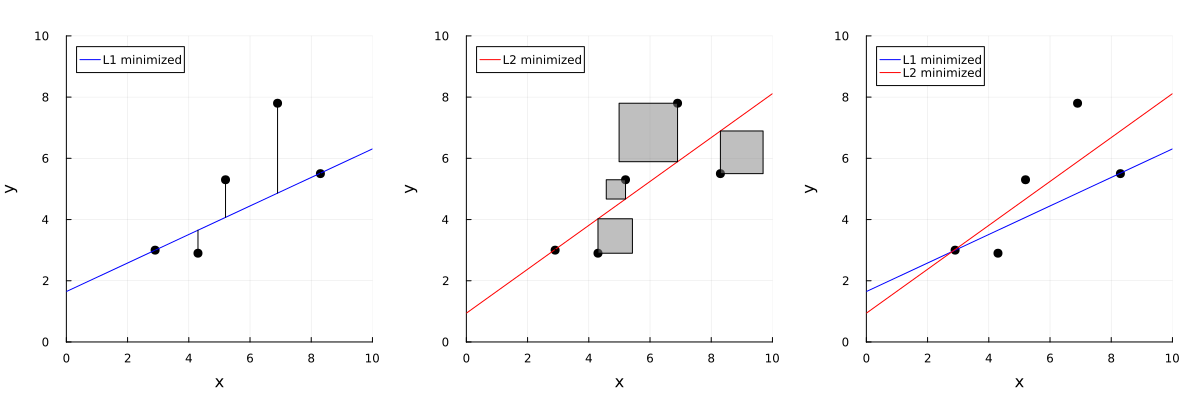

In [10]:
plot(p1, p2, p3
    , layout = (1,3), ratio=:equal
    , xlims=(0,10), ylims=(0,10)
    , legend=:topleft, size=(1200, 400)
    , xlabel = "x", ylabel = "y"
    , margin=5mm
)

In [11]:
println("L1 line: $(round(α₁,digits = 2)) + $(round(β₁,digits = 2))x")
println("L2 line: $(round(α₂,digits = 2)) + $(round(β₂,digits = 2))x")

L1 line: 1.65 + 0.47x
L2 line: 0.94 + 0.72x


# References
- [ ] [8_chapter\bestFitLine.jl](https://github.com/h-Klok/StatsWithJuliaBook/blob/master/8_chapter/bestFitLine.jl)